In [42]:
import pandas as pd
import seaborn as sns 
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import statistics
import stats
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import plotly.express as px
import datetime
import time


""" Processing time series on domestic Electric energy consumption"""

#open file
e=pd.read_csv('D202.csv')
print(e.columns)
e_df=DataFrame(e)
print(e_df)

#parse index
e_df['DATE']=pd.to_datetime(e_df['DATE'], infer_datetime_format=True)
indexeddf=e_df.set_index(['DATE'])
print(indexeddf)


#parsing to time format and extracting dates with 'created_at'
x=e_df['DATE']=pd.to_datetime(e_df['DATE'], format='%m-%d-%y')

Day=e_df['DATE'].dt.day_name()
Month=e_df['DATE'].dt.month_name()
Year=e_df['DATE'].dt.year

#subsetting timeseries
e_df['Year']=e_df['DATE'].dt.year
e_df['Month']=e_df['DATE'].dt.month_name()
e_df['Day']=e_df['DATE'].dt.day


Index(['DATE', 'START_TIME', 'END_TIME', 'USAGE', 'COST_dollar'], dtype='object')
             DATE START_TIME END_TIME  USAGE  COST_dollar
0      10/22/2016       0:00     0:14   0.01         0.00
1      10/22/2016       0:15     0:29   0.01         0.00
2      10/22/2016       0:30     0:44   0.01         0.00
3      10/22/2016       0:45     0:59   0.01         0.00
4      10/22/2016       1:00     1:14   0.01         0.00
...           ...        ...      ...    ...          ...
70363  10/24/2018      22:45    22:59   0.02         0.00
70364  10/24/2018      23:00    23:14   0.03         0.01
70365  10/24/2018      23:15    23:29   0.03         0.01
70366  10/24/2018      23:30    23:44   0.03         0.01
70367  10/24/2018      23:45    23:59   0.03         0.01

[70368 rows x 5 columns]
           START_TIME END_TIME  USAGE  COST_dollar
DATE                                              
2016-10-22       0:00     0:14   0.01         0.00
2016-10-22       0:15     0:29   0.01      

Daily index on mean values

In [25]:
#day_index per week 'D' 
Day_index=indexeddf.resample('D').mean()
print(Day_index)

               USAGE  COST_dollar
DATE                             
2016-10-22  0.047083     0.006250
2016-10-23  0.242917     0.045417
2016-10-24  0.074583     0.012500
2016-10-25  0.090417     0.016667
2016-10-26  0.052500     0.008750
...              ...          ...
2018-10-20  0.083333     0.017500
2018-10-21  0.011667     0.001667
2018-10-22  0.006667     0.000417
2018-10-23  0.012500     0.000000
2018-10-24  0.020000     0.002917

[733 rows x 2 columns]


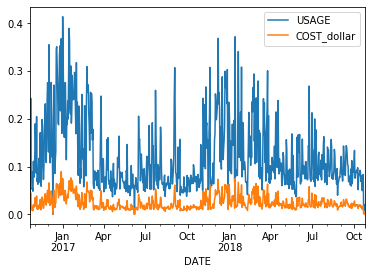

In [37]:
Day_index.plot()

Weely index aggregation on max values

In [35]:
#weekly index aggregation
Week_index_w=indexeddf.resample('W').agg({'COST_dollar':'max','USAGE':'max'})

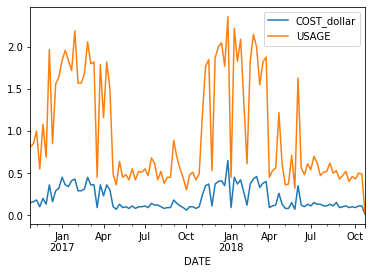

In [40]:
Week_index_w.plot()


Min values per week

In [41]:
#weekly index aggregation
Week_index=indexeddf.resample('W').agg({'COST_dollar':'min','USAGE':'min'})
print(Week_index.stack())

DATE                   
2016-10-23  COST_dollar    0.00
            USAGE          0.01
2016-10-30  COST_dollar    0.00
            USAGE          0.01
2016-11-06  COST_dollar    0.00
                           ... 
2018-10-14  USAGE          0.01
2018-10-21  COST_dollar    0.00
            USAGE          0.00
2018-10-28  COST_dollar    0.00
            USAGE          0.00
Length: 212, dtype: float64


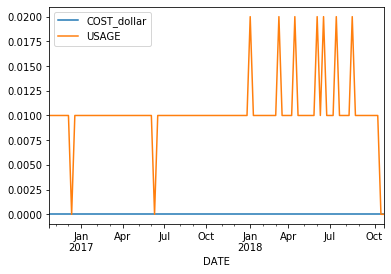

In [29]:
Week_index.plot()

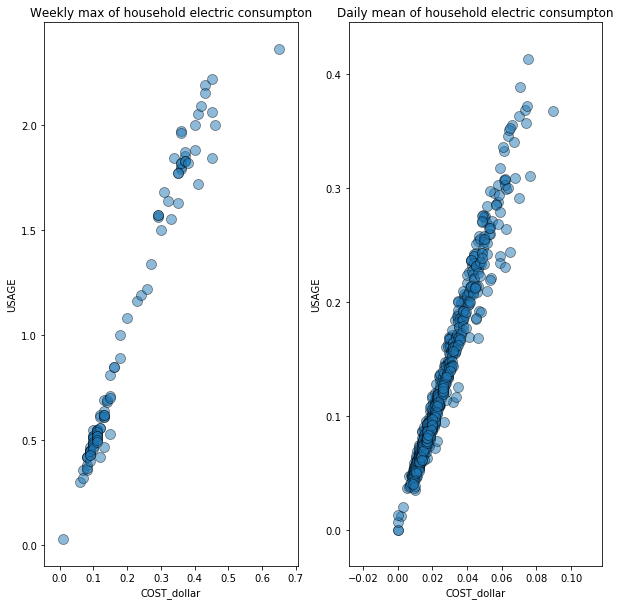

In [51]:
#subplot intelligence

f,axes = plt.subplots(1,2, figsize=(10, 10))
C=sns.scatterplot(Week_index_w.COST_dollar    , Week_index_w.USAGE, s=100, edgecolor='black', alpha=0.5,\
     palette='Blues',ax=axes[0]).set_title("Weekly max of household electric consumpton")

D=sns.scatterplot(Day_index.COST_dollar , Day_index.USAGE, s=100, edgecolor='black', alpha=0.5,\
     palette='Blues',ax=axes[1]).set_title("Daily mean of household electric consumpton")

plt.show()